In [146]:
import psycopg2
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [147]:
df=pd.read_csv('Salaries.csv')

C:\Users\HOME\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [148]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [151]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [152]:
def find_job_title(row): #give credit to MattEvanoff because he made this function
    
    police_title = ['police']
    fire_title = ['fire']
    medical_title = ['medical']
    
    for police in police_title:
        if police in row.lower():
            return 'police'    
    for fire in fire_title:
        if fire in row.lower():
            return 'fire'
    for medical in medical_title:
        if medical in row.lower():
            return 'medical'   
    else:
        return 'other'
    
df['New_JobTitle']= df['JobTitle'].map(find_job_title)

In [153]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,New_JobTitle
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,other
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,police
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,police
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,other
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,fire


In [154]:
df=df[df['EmployeeName']!='Not provided']
df=df[df['New_JobTitle']!='other']
df.reset_index(drop=True,inplace=True)

In [155]:
df.drop(columns=['Notes', 'Agency', 'Id', 'Status', 'JobTitle'], axis=1, inplace=True)

In [156]:
df[df['EmployeeName']=='Not provided'].sum()

EmployeeName        0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
New_JobTitle        0.0
dtype: float64

In [157]:
df

,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,New_JobTitle
0,GARY JIMENEZ,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,police
1,ALBERT PARDINI,212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,police
2,PATRICK GARDNER,134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,fire
3,ALSON LEE,92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,fire
4,MICHAEL MORRIS,176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,fire
...,...,...,...,...,...,...,...,...,...
15762,Dennis V Cravalho,0.00,0.00,242.66,0.00,242.66,242.66,2014,police
15763,Elizabeth A Maron,0.00,0.00,212.39,0.00,212.39,212.39,2014,police
15764,Patricia O Williams,0.00,0.00,134.78,0.00,134.78,134.78,2014,police
15765,Lawrence F Gatt,73.33,0.00,0.00,0.73,73.33,74.06,2014,fire


In [158]:
df.fillna(0,inplace=True)

In [159]:
df

,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,New_JobTitle
0,GARY JIMENEZ,155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,police
1,ALBERT PARDINI,212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,police
2,PATRICK GARDNER,134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,fire
3,ALSON LEE,92492.01,89062.9,134426.14,0,315981.05,315981.05,2011,fire
4,MICHAEL MORRIS,176932.64,86362.68,40132.23,0,303427.55,303427.55,2011,fire
...,...,...,...,...,...,...,...,...,...
15762,Dennis V Cravalho,0.00,0.00,242.66,0.00,242.66,242.66,2014,police
15763,Elizabeth A Maron,0.00,0.00,212.39,0.00,212.39,212.39,2014,police
15764,Patricia O Williams,0.00,0.00,134.78,0.00,134.78,134.78,2014,police
15765,Lawrence F Gatt,73.33,0.00,0.00,0.73,73.33,74.06,2014,fire


### 1 задание: зарплаты между разными группами

In [160]:
import sqlite3
conn = sqlite3.connect('database.sqlite')  
c = conn.cursor()

In [ ]:
df.to_sql('job', conn)

In [161]:
c.execute('select year, New_JobTitle, max(BasePay), avg(BasePay)/2, avg(BasePay) from job group by year, New_JobTitle')
rez= c.fetchall()
rez

[(2011, 'fire', '99942.29', 53274.63460589441, 106549.26921178882),
 (2011, 'medical', '9839.72', 28671.122552204193, 57342.24510440839),
 (2011, 'police', '99982.33', 52990.60738654456, 105981.21477308912),
 (2012, 'fire', '99589.68', 54611.32341269835, 109222.6468253967),
 (2012, 'medical', '9851.96', 26921.550496183194, 53843.10099236639),
 (2012, 'police', '99942.41', 48114.503092756655, 96229.00618551331),
 (2013, 'fire', '98731.4', 58079.641636552944, 116159.28327310589),
 (2013, 'medical', '9794.27', 27815.332435294084, 55630.66487058817),
 (2013, 'police', '99287.06', 51202.91825745272, 102405.83651490544),
 (2014, 'fire', '99889.45', 54089.643752481694, 108179.28750496339),
 (2014, 'medical', '9925.80', 28408.249760273924, 56816.49952054785),
 (2014, 'police', '99958.01', 46936.030147291, 93872.060294582)]

In [162]:
first = pd.DataFrame(rez).round(2)
first

,0,1,2,3,4
0,2011,fire,99942.29,53274.63,106549.27
1,2011,medical,9839.72,28671.12,57342.25
2,2011,police,99982.33,52990.61,105981.21
3,2012,fire,99589.68,54611.32,109222.65
4,2012,medical,9851.96,26921.55,53843.10
5,2012,police,99942.41,48114.50,96229.01
6,2013,fire,98731.4,58079.64,116159.28
7,2013,medical,9794.27,27815.33,55630.66
8,2013,police,99287.06,51202.92,102405.84
9,2014,fire,99889.45,54089.64,108179.29


In [163]:
first.columns=['year', 'job', 'max_zp', 'median_zp', 'avg_zp']

In [164]:
first

,year,job,max_zp,median_zp,avg_zp
0,2011,fire,99942.29,53274.63,106549.27
1,2011,medical,9839.72,28671.12,57342.25
2,2011,police,99982.33,52990.61,105981.21
3,2012,fire,99589.68,54611.32,109222.65
4,2012,medical,9851.96,26921.55,53843.10
5,2012,police,99942.41,48114.50,96229.01
6,2013,fire,98731.4,58079.64,116159.28
7,2013,medical,9794.27,27815.33,55630.66
8,2013,police,99287.06,51202.92,102405.84
9,2014,fire,99889.45,54089.64,108179.29


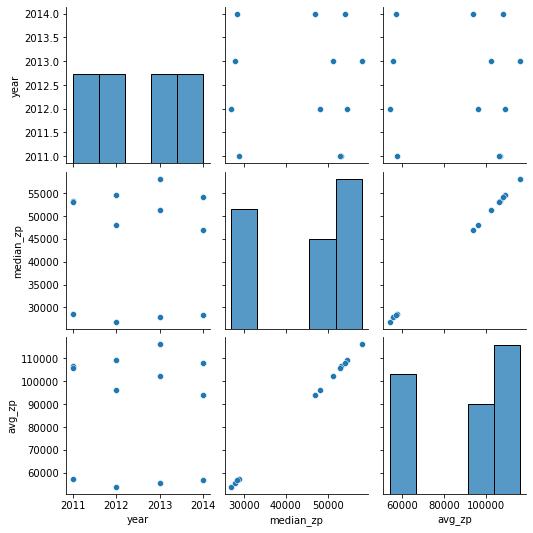

In [165]:
#распределение среднего заработка, медианы и максимальной по годам, в зависимости от работы
sns.pairplot(first)

### 2 задание: распределение базовой оплаты, сверхурочной работы и льгот между разными департаментами

In [170]:
c.execute('select year, New_JobTitle, sum(BasePay) from job group by year, New_JobTitle')
rez2= c.fetchall()
rez2

[(2011, 'fire', 155455383.77999988),
 (2011, 'medical', 24714507.640000015),
 (2011, 'police', 266224811.50999987),
 (2012, 'fire', 158263615.24999982),
 (2012, 'medical', 21160338.68999999),
 (2012, 'police', 184663462.87000003),
 (2013, 'fire', 167153208.62999937),
 (2013, 'medical', 23643032.56999997),
 (2013, 'police', 188938768.37000054),
 (2014, 'fire', 163458903.4199997),
 (2014, 'medical', 24885626.789999958),
 (2014, 'police', 178450786.6200004)]

In [171]:
second_BasePay=pd.DataFrame(rez2)
second_BasePay

,0,1,2
0,2011,fire,1.554554e+08
1,2011,medical,2.471451e+07
2,2011,police,2.662248e+08
3,2012,fire,1.582636e+08
4,2012,medical,2.116034e+07
5,2012,police,1.846635e+08
6,2013,fire,1.671532e+08
7,2013,medical,2.364303e+07
8,2013,police,1.889388e+08
9,2014,fire,1.634589e+08


In [172]:
second_BasePay.columns=['year', 'work', 'sum(BasePay)']
second_BasePay

,year,work,sum(BasePay)
0,2011,fire,1.554554e+08
1,2011,medical,2.471451e+07
2,2011,police,2.662248e+08
3,2012,fire,1.582636e+08
4,2012,medical,2.116034e+07
5,2012,police,1.846635e+08
6,2013,fire,1.671532e+08
7,2013,medical,2.364303e+07
8,2013,police,1.889388e+08
9,2014,fire,1.634589e+08


<AxesSubplot:xlabel='year', ylabel='sum(BasePay)'>

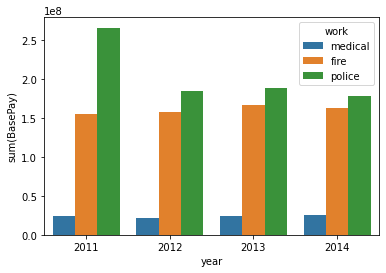

In [173]:
#распределение основной оплаты по каждому департаменту
sns.barplot(x='year', y='sum(BasePay)', hue='work', hue_order=['medical', 'fire', 'police'], data=second_BasePay)

In [174]:
c.execute('select year, New_JobTitle, sum(OvertimePay)from job group by year, New_JobTitle')
rez3= c.fetchall()
rez3

[(2011, 'fire', 31898485.779999916),
 (2011, 'medical', 1135499.3799999992),
 (2011, 'police', 22225776.170000024),
 (2012, 'fire', 40499542.119999975),
 (2012, 'medical', 516335.45000000036),
 (2012, 'police', 24739129.820000026),
 (2013, 'fire', 43978891.98999993),
 (2013, 'medical', 520985.7599999998),
 (2013, 'police', 24573767.449999947),
 (2014, 'fire', 38625129.759999976),
 (2014, 'medical', 544616.9700000003),
 (2014, 'police', 26684074.320000045)]

In [175]:
second_OvertimePay=pd.DataFrame(rez3)
second_OvertimePay

,0,1,2
0,2011,fire,31898485.78
1,2011,medical,1135499.38
2,2011,police,22225776.17
3,2012,fire,40499542.12
4,2012,medical,516335.45
5,2012,police,24739129.82
6,2013,fire,43978891.99
7,2013,medical,520985.76
8,2013,police,24573767.45
9,2014,fire,38625129.76


In [176]:
second_OvertimePay.columns=['year', 'work', 'sum(OvertimePay)']
second_OvertimePay

,year,work,sum(OvertimePay)
0,2011,fire,31898485.78
1,2011,medical,1135499.38
2,2011,police,22225776.17
3,2012,fire,40499542.12
4,2012,medical,516335.45
5,2012,police,24739129.82
6,2013,fire,43978891.99
7,2013,medical,520985.76
8,2013,police,24573767.45
9,2014,fire,38625129.76


<AxesSubplot:xlabel='year', ylabel='sum(OvertimePay)'>

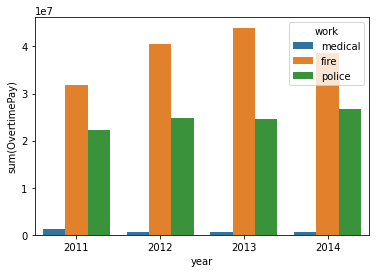

In [177]:
#распределение сверхурочной оплаты по каждому департаменту
sns.barplot(x='year', y='sum(OvertimePay)', hue='work', hue_order=['medical', 'fire', 'police'], data=second_OvertimePay)

In [178]:
c.execute('select year, New_JobTitle, sum(Benefits) from job group by year, New_JobTitle')
rez4= c.fetchall()
rez4

[(2011, 'fire', None),
 (2011, 'medical', None),
 (2011, 'police', None),
 (2012, 'fire', 52859030.28999997),
 (2012, 'medical', 9703275.839999998),
 (2012, 'police', 57429170.21999992),
 (2013, 'fire', 56620946.75999999),
 (2013, 'medical', 9108516.81999999),
 (2013, 'police', 59201909.1599999),
 (2014, 'fire', 60707949.89000007),
 (2014, 'medical', 10195686.160000002),
 (2014, 'police', 61511276.279999934)]

In [179]:
second_Benefits=pd.DataFrame(rez4)
second_Benefits

,0,1,2
0,2011,fire,NaN
1,2011,medical,NaN
2,2011,police,NaN
3,2012,fire,52859030.29
4,2012,medical,9703275.84
5,2012,police,57429170.22
6,2013,fire,56620946.76
7,2013,medical,9108516.82
8,2013,police,59201909.16
9,2014,fire,60707949.89


In [180]:
second_Benefits.columns=['year', 'work', 'sum(Benefits)']
second_Benefits

,year,work,sum(Benefits)
0,2011,fire,NaN
1,2011,medical,NaN
2,2011,police,NaN
3,2012,fire,52859030.29
4,2012,medical,9703275.84
5,2012,police,57429170.22
6,2013,fire,56620946.76
7,2013,medical,9108516.82
8,2013,police,59201909.16
9,2014,fire,60707949.89


<AxesSubplot:xlabel='year', ylabel='sum(Benefits)'>

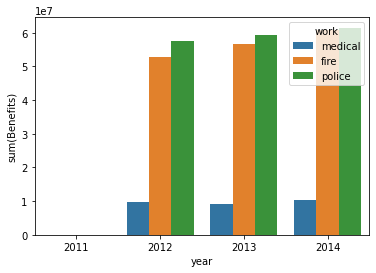

In [181]:
##распределение льгот по каждому департаменту
sns.barplot(x='year', y='sum(Benefits)', hue='work', hue_order=['medical', 'fire', 'police'], data=second_Benefits)

### 3 задание: распределение бюджета на разные департаменты

In [182]:
c.execute('select year, New_JobTitle, sum(TotalPayBenefits) from job group by year, New_JobTitle')
rez5= c.fetchall()
rez5

[(2011, 'fire', 211563265.9400002),
 (2011, 'medical', 26921486.589999996),
 (2011, 'police', 319268095.2099995),
 (2012, 'fire', 273810371.20999956),
 (2012, 'medical', 31832682.18000003),
 (2012, 'police', 280530623.1400003),
 (2013, 'fire', 291038363.48999995),
 (2013, 'medical', 33782026.899999976),
 (2013, 'police', 288728271.5900011),
 (2014, 'fire', 285536817.2799989),
 (2014, 'medical', 36133544.350000024),
 (2014, 'police', 282011529.0799999)]

In [183]:
third=pd.DataFrame(rez5)
third

,0,1,2
0,2011,fire,2.115633e+08
1,2011,medical,2.692149e+07
2,2011,police,3.192681e+08
3,2012,fire,2.738104e+08
4,2012,medical,3.183268e+07
5,2012,police,2.805306e+08
6,2013,fire,2.910384e+08
7,2013,medical,3.378203e+07
8,2013,police,2.887283e+08
9,2014,fire,2.855368e+08


In [184]:
third.columns=['year', 'work', 'sum(TotalPayBenefits)']
third

,year,work,sum(TotalPayBenefits)
0,2011,fire,2.115633e+08
1,2011,medical,2.692149e+07
2,2011,police,3.192681e+08
3,2012,fire,2.738104e+08
4,2012,medical,3.183268e+07
5,2012,police,2.805306e+08
6,2013,fire,2.910384e+08
7,2013,medical,3.378203e+07
8,2013,police,2.887283e+08
9,2014,fire,2.855368e+08


<AxesSubplot:xlabel='year', ylabel='sum(TotalPayBenefits)'>

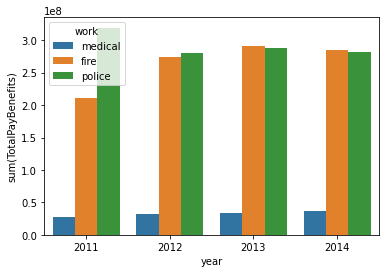

In [185]:
#распределение бюджета на оплату труда по каждому департаменту
sns.barplot(x='year', y='sum(TotalPayBenefits)', hue='work', hue_order=['medical', 'fire', 'police'], data=third)

### 4 задание: количество людей в каждом департаменте

In [186]:
c.execute('select year, count(EmployeeName), New_JobTitle from job group by year, New_JobTitle')
rez6= c.fetchall()
rez6

[(2011, 1459, 'fire'),
 (2011, 431, 'medical'),
 (2011, 2512, 'police'),
 (2012, 1449, 'fire'),
 (2012, 393, 'medical'),
 (2012, 1919, 'police'),
 (2013, 1460, 'fire'),
 (2013, 425, 'medical'),
 (2013, 1869, 'police'),
 (2014, 1511, 'fire'),
 (2014, 438, 'medical'),
 (2014, 1901, 'police')]

In [187]:
four=pd.DataFrame(rez6)
four

,0,1,2
0,2011,1459,fire
1,2011,431,medical
2,2011,2512,police
3,2012,1449,fire
4,2012,393,medical
5,2012,1919,police
6,2013,1460,fire
7,2013,425,medical
8,2013,1869,police
9,2014,1511,fire


In [188]:
four.columns=['year', 'people', 'work']
four

,year,people,work
0,2011,1459,fire
1,2011,431,medical
2,2011,2512,police
3,2012,1449,fire
4,2012,393,medical
5,2012,1919,police
6,2013,1460,fire
7,2013,425,medical
8,2013,1869,police
9,2014,1511,fire


<AxesSubplot:xlabel='year', ylabel='people'>

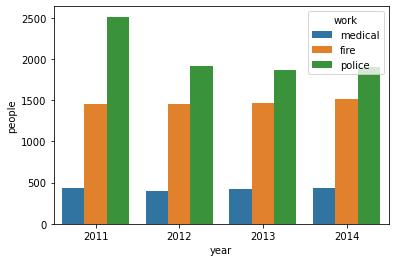

In [189]:
#распределение рабоnников по каждому департаменту
sns.barplot(x='year', y='people', hue='work', hue_order=['medical', 'fire', 'police'], data=four)

In [191]:
c.execute('select EmployeeName, TotalPayBenefits from job where year=2011')
rez7= c.fetchall()
rez7

[('GARY JIMENEZ', 538909.28),
 ('ALBERT PARDINI', 335279.91),
 ('PATRICK GARDNER', 326373.19),
 ('ALSON LEE', 315981.05),
 ('MICHAEL MORRIS', 303427.55),
 ('JOANNE HAYES-WHITE', 302377.73),
 ('ARTHUR KENNEY', 299494.17),
 ('PATRICIA JACKSON', 297608.92),
 ('DAVID FRANKLIN', 286347.05),
 ('RICHARD CORRIEA', 286213.86),
 ('SEBASTIAN WONG', 278569.21),
 ('MARTY ROSS', 276434.22),
 ('ELLEN MOFFATT', 274550.25),
 ('VENUS AZAR', 274190.27),
 ('JUDY MELINEK', 273771.21),
 ('GEORGE GARCIA', 273702.71),
 ('VICTOR WYRSCH', 270672.63),
 ('JOSEPH DRISCOLL', 270324.91),
 ('GREGORY SUHR', 267992.59),
 ('JOHN HANLEY', 265784.56),
 ('RAYMOND GUZMAN', 265463.46),
 ('DENISE SCHMITT', 264074.6),
 ('MONICA FIELDS', 261366.14),
 ('DAVID SHINN', 259927.11),
 ('JOHN TURSI', 258588.39),
 ('JOSE VELO', 258364.22),
 ('SUSAN CURRIN', 257124.44),
 ('JAMES BOSCH', 253269.44),
 ('JONES WONG', 251935.01),
 ('BRENDAN WARD', 251685.16),
 ('MICHAEL THOMPSON', 250595.39),
 ('THOMAS ABBOTT', 250408.49),
 ('THOMAS SIRAGUS

In [192]:
a=pd.DataFrame(rez7)
a

,0,1
0,GARY JIMENEZ,538909.28
1,ALBERT PARDINI,335279.91
2,PATRICK GARDNER,326373.19
3,ALSON LEE,315981.05
4,MICHAEL MORRIS,303427.55
...,...,...
4397,ROBERTO LUCHA,402.17
4398,SUSAN ROTH,283.86
4399,DEBRA TANIS,92.21
4400,ANTOINETTE GIBSON,42.02


In [193]:
a['hist']=(a[1]//5000)*5000

In [194]:
a

,0,1,hist
0,GARY JIMENEZ,538909.28,535000.0
1,ALBERT PARDINI,335279.91,335000.0
2,PATRICK GARDNER,326373.19,325000.0
3,ALSON LEE,315981.05,315000.0
4,MICHAEL MORRIS,303427.55,300000.0
...,...,...,...
4397,ROBERTO LUCHA,402.17,0.0
4398,SUSAN ROTH,283.86,0.0
4399,DEBRA TANIS,92.21,0.0
4400,ANTOINETTE GIBSON,42.02,0.0


In [195]:
a['hist']=a['hist'].map(lambda x: str(x) +' - '+ str((x + 5000)))

In [196]:
a

,0,1,hist
0,GARY JIMENEZ,538909.28,535000.0 - 540000.0
1,ALBERT PARDINI,335279.91,335000.0 - 340000.0
2,PATRICK GARDNER,326373.19,325000.0 - 330000.0
3,ALSON LEE,315981.05,315000.0 - 320000.0
4,MICHAEL MORRIS,303427.55,300000.0 - 305000.0
...,...,...,...
4397,ROBERTO LUCHA,402.17,0.0 - 5000.0
4398,SUSAN ROTH,283.86,0.0 - 5000.0
4399,DEBRA TANIS,92.21,0.0 - 5000.0
4400,ANTOINETTE GIBSON,42.02,0.0 - 5000.0


In [197]:
a_hist = a.groupby('hist').count()
a_hist

,0,1
hist,,
0.0 - 5000.0,30,30
10000.0 - 15000.0,25,25
100000.0 - 105000.0,68,68
105000.0 - 110000.0,117,117
110000.0 - 115000.0,186,186
...,...,...
75000.0 - 80000.0,61,61
80000.0 - 85000.0,61,61
85000.0 - 90000.0,27,27


In [198]:
a_hist=a_hist.reset_index()
a_hist

,hist,0,1
0,0.0 - 5000.0,30,30
1,10000.0 - 15000.0,25,25
2,100000.0 - 105000.0,68,68
3,105000.0 - 110000.0,117,117
4,110000.0 - 115000.0,186,186
...,...,...,...
58,75000.0 - 80000.0,61,61
59,80000.0 - 85000.0,61,61
60,85000.0 - 90000.0,27,27
61,90000.0 - 95000.0,35,35


<AxesSubplot:>

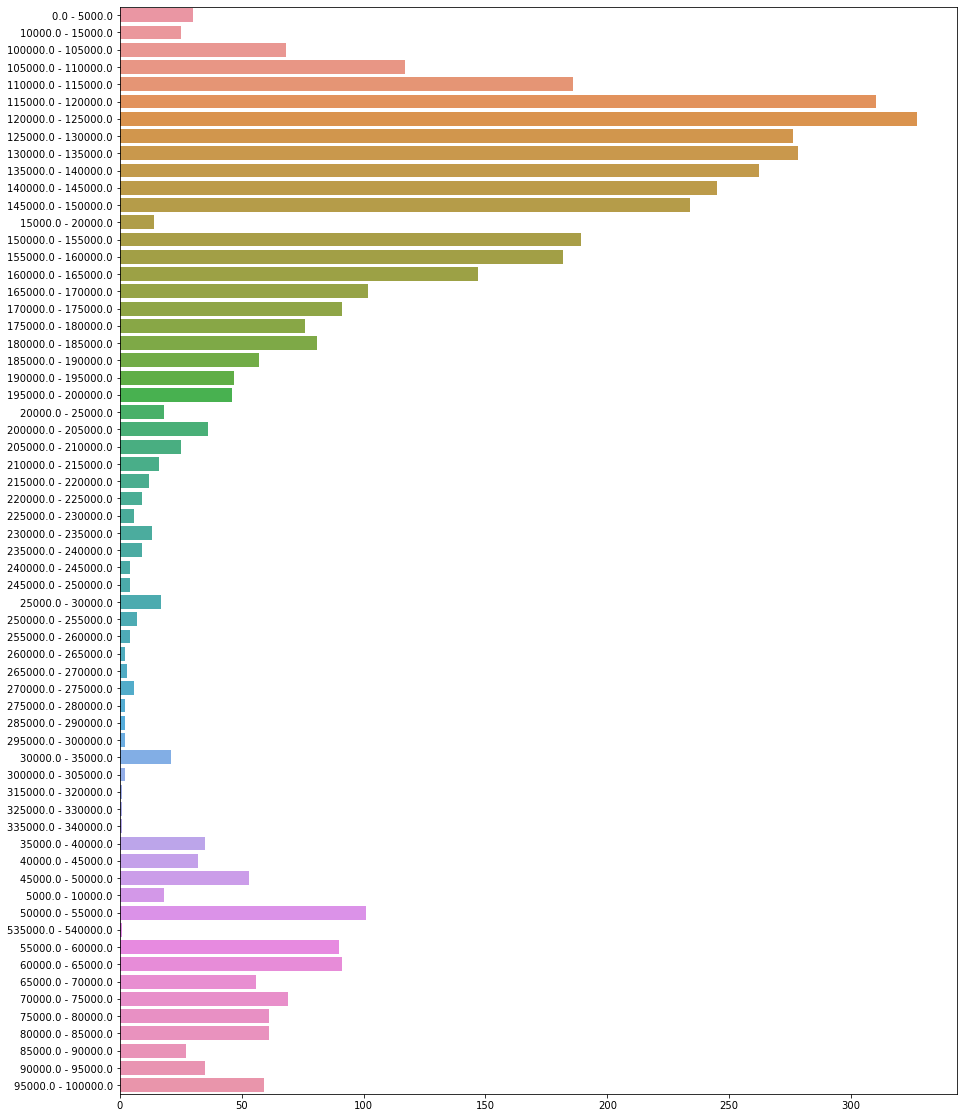

In [199]:
#Распределение зарплат по кол-ву людей за 2011 год
plt.figure(figsize=(15,20))
sns.barplot(data=a_hist, x=a_hist[1].tolist(), y= a_hist['hist'].tolist())

In [200]:
c.execute('select EmployeeName, TotalPayBenefits from job where year=2012')
rez8= c.fetchall()
rez8

[('Gary Altenberg', 407274.78),
 ('Gregory Suhr', 391362.3),
 ('Joanne Hayes-White', 386807.48),
 ('Frederick Binkley', 381643.11),
 ('David Franklin', 374214.87),
 ('Brendan Ward', 371531.92),
 ('Samson Lai', 369463.56),
 ('Rudy Castellanos', 369309.16),
 ('Marty Ross', 366322.23),
 ('Raymond Guzman', 353241.69),
 ('Michael Rolovich', 347131.09),
 ('Mark Gonzales', 345306.29),
 ('Darryl Hunter', 343514.27),
 ('Michael Delane', 339433.38),
 ('Susan Currin', 339368.15),
 ('Philip Stevens', 337576.85),
 ('Thomas Siragusa', 337046.07),
 ('Joseph Driscoll', 331834.79),
 ('Scott Scholzen', 331307.02),
 ('Pete Fay Jr', 327741.82),
 ('Gregory Stangland', 321780.77),
 ('Arthur Kenney', 321638.46),
 ('Kevin Taylor', 318966.66),
 ('Robert Postel', 318593.92),
 ('Kirk Richardson', 316783.74),
 ('Kevin Burke', 315464.92),
 ('Lorrie Kalos', 314882.38),
 ('James Vannucchi', 308936.74),
 ('Alvin Lau', 308774.6),
 ('Bryan Rubenstein', 308577.47),
 ('Michael Thompson', 305696.81),
 ('Arnold Choy', 3049

In [201]:
a2=pd.DataFrame(rez8)
a2

,0,1
0,Gary Altenberg,407274.78
1,Gregory Suhr,391362.30
2,Joanne Hayes-White,386807.48
3,Frederick Binkley,381643.11
4,David Franklin,374214.87
...,...,...
3756,Vickie Mojica,44.28
3757,Anthony Nelson,41.12
3758,Donald Brown,39.53
3759,William Pyne,33.22


In [202]:
a2['hist']=(a2[1]//5000)*5000

In [203]:
a2['hist']=a2['hist'].map(lambda x: str(x) +' - '+ str((x + 5000)))

In [204]:
a2_hist = a2.groupby('hist').count()

In [205]:
a2_hist=a2_hist.reset_index()

<AxesSubplot:>

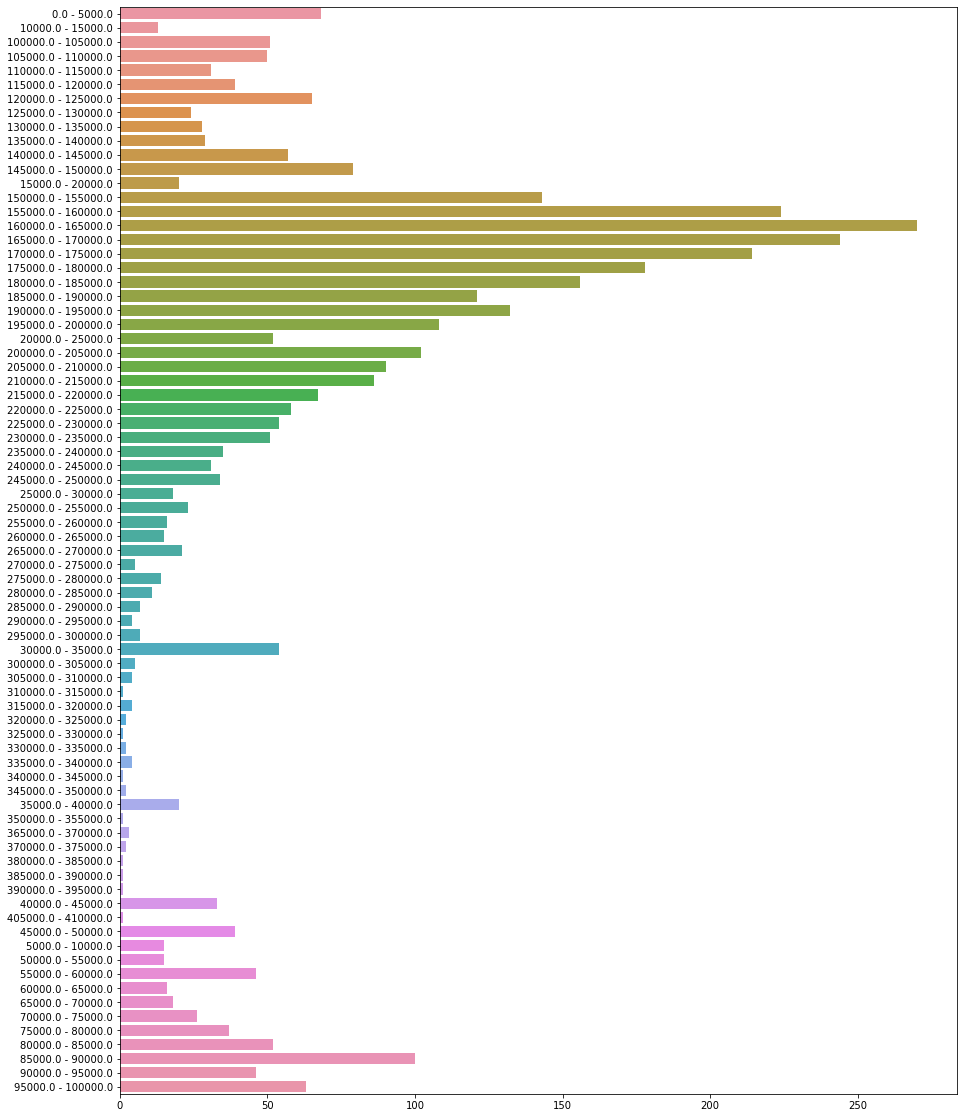

In [206]:
#Распределение зарплат по кол-ву людей за 2012 год
plt.figure(figsize=(15,20))
sns.barplot(data=a2_hist, x=a2_hist[1].tolist(), y= a2_hist['hist'].tolist())

In [207]:
c.execute('select EmployeeName, TotalPayBenefits from job where year=2013')
rez9= c.fetchall()
rez9

[('Gregory P Suhr', 425815.28),
 ('Joanne M Hayes-White', 422353.4),
 ('Samson  Lai', 404167.27),
 ('David L Franklin', 396778.68),
 ('Thomas A Siragusa', 386109.21),
 ('Raymond A Guzman', 372411.97),
 ('Marty A Ross', 371608.35),
 ('Mark A Gonzales', 368400.67),
 ('Mark J Johnson', 367832.59),
 ('Bryan W Rubenstein', 367509.32),
 ('Gary L Altenberg', 366406.55),
 ('Arthur W Kenney', 359467.26),
 ('Lorrie A Kalos', 358728.65),
 ('Rudy J Castellanos', 354885.15),
 ('Susan  Currin', 352343.22),
 ('Thomas F Abbott', 350082.24),
 ('Robert F Postel', 346963.87),
 ('Jeffrey J Barden', 346621.8),
 ('Pete L Fay Jr', 345649.65),
 ('Khairul A Ali', 345643.46),
 ('John A Hickey', 343551.44),
 ('Brendan A Ward', 341625.7),
 ('Kevin M Burke', 338907.72),
 ('Kirk W Richardson', 335911.68),
 ('Edmund G Dea', 333981.84),
 ('Michael R Bryant', 333528.23),
 ('Michael W Delane', 332223.43),
 ('Frederick  Binkley', 331743.01),
 ('Joseph D Driscoll', 331439.87),
 ('Michael  Castagnola', 327898.34),
 ('Terr

In [208]:
a3=pd.DataFrame(rez8)
a3

,0,1
0,Gary Altenberg,407274.78
1,Gregory Suhr,391362.30
2,Joanne Hayes-White,386807.48
3,Frederick Binkley,381643.11
4,David Franklin,374214.87
...,...,...
3756,Vickie Mojica,44.28
3757,Anthony Nelson,41.12
3758,Donald Brown,39.53
3759,William Pyne,33.22


In [209]:
a3['hist']=(a3[1]//5000)*5000

In [210]:
a3['hist']=a3['hist'].map(lambda x: str(x) +' - '+ str((x + 5000)))

In [211]:
a3_hist = a3.groupby('hist').count()

In [212]:
a3_hist=a3_hist.reset_index()

<AxesSubplot:>

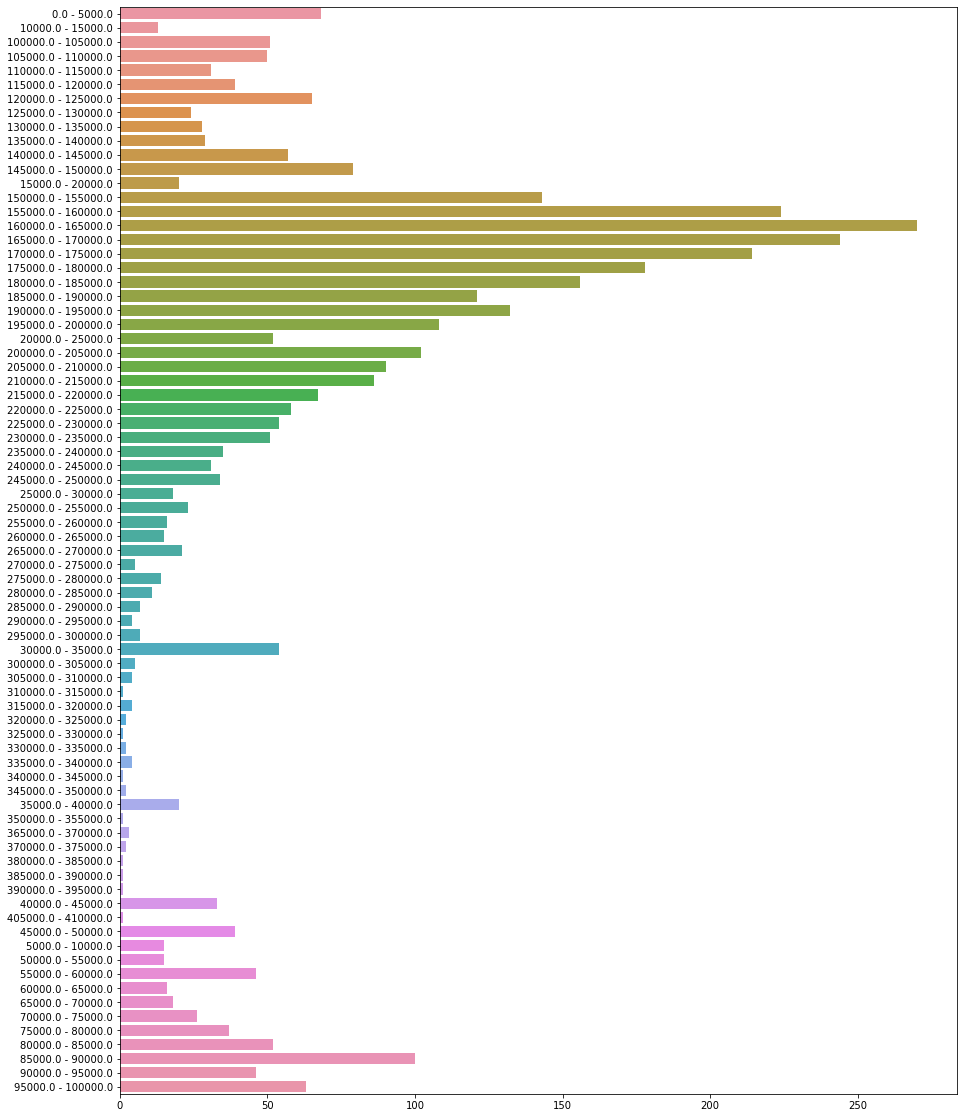

In [213]:
#Распределение зарплат по кол-ву людей за 2013 год
plt.figure(figsize=(15,20))
sns.barplot(data=a3_hist, x=a3_hist[1].tolist(), y= a3_hist['hist'].tolist())

In [214]:
c.execute('select EmployeeName, TotalPayBenefits from job where year=2014')
rez10= c.fetchall()
rez10

[('Gregory P Suhr', 418019.22),
 ('Joanne M Hayes-White', 417435.1),
 ('Samson Lai', 395361.86),
 ('David L Franklin', 393990.13),
 ('Raymond A Guzman', 370464.42),
 ('Jose L Velo', 368152.0),
 ('Bryan W Rubenstein', 365782.44),
 ('Mark A Gonzales', 365548.28),
 ('Thomas A Siragusa', 360443.81),
 ('Arthur W Kenney', 353797.13),
 ('Susan Currin', 349527.75),
 ('Kevin M Burke', 342814.32),
 ('Marty A Ross', 341838.55),
 ('Lorrie A Kalos', 338123.95),
 ('Khairul A Ali', 336639.24),
 ('Victor H Wyrsch', 330272.23),
 ('Kevin W Smith', 326394.4),
 ('Kirk W Richardson', 324556.16),
 ('Pete L Fay Jr', 322313.14),
 ('Rudy J Castellanos', 321216.69),
 ('Jay K Lee', 319494.22),
 ('Jeffrey Myers', 318297.51),
 ('Robert F Postel', 316012.87),
 ('Michael R Bryant', 316003.55),
 ('Mark J Johnson', 314390.21),
 ('Raemona E Williams', 313953.67),
 ('Romelia C Scott', 313648.31),
 ('Dale C Carnes', 309712.61),
 ('Charles Crane', 309157.4),
 ('Michie L Wong', 309148.96),
 ('John A Hickey', 307523.68),
 (

In [215]:
a4=pd.DataFrame(rez8)
a4

,0,1
0,Gary Altenberg,407274.78
1,Gregory Suhr,391362.30
2,Joanne Hayes-White,386807.48
3,Frederick Binkley,381643.11
4,David Franklin,374214.87
...,...,...
3756,Vickie Mojica,44.28
3757,Anthony Nelson,41.12
3758,Donald Brown,39.53
3759,William Pyne,33.22


In [216]:
a4['hist']=(a4[1]//5000)*5000

In [217]:
a4['hist']=a4['hist'].map(lambda x: str(x) +' - '+ str((x + 5000)))

In [218]:
a4_hist = a4.groupby('hist').count()

In [219]:
a4_hist=a4_hist.reset_index()
a4_hist

,hist,0,1
0,0.0 - 5000.0,68,68
1,10000.0 - 15000.0,13,13
2,100000.0 - 105000.0,51,51
3,105000.0 - 110000.0,50,50
4,110000.0 - 115000.0,31,31
...,...,...,...
72,75000.0 - 80000.0,37,37
73,80000.0 - 85000.0,52,52
74,85000.0 - 90000.0,100,100
75,90000.0 - 95000.0,46,46


<AxesSubplot:>

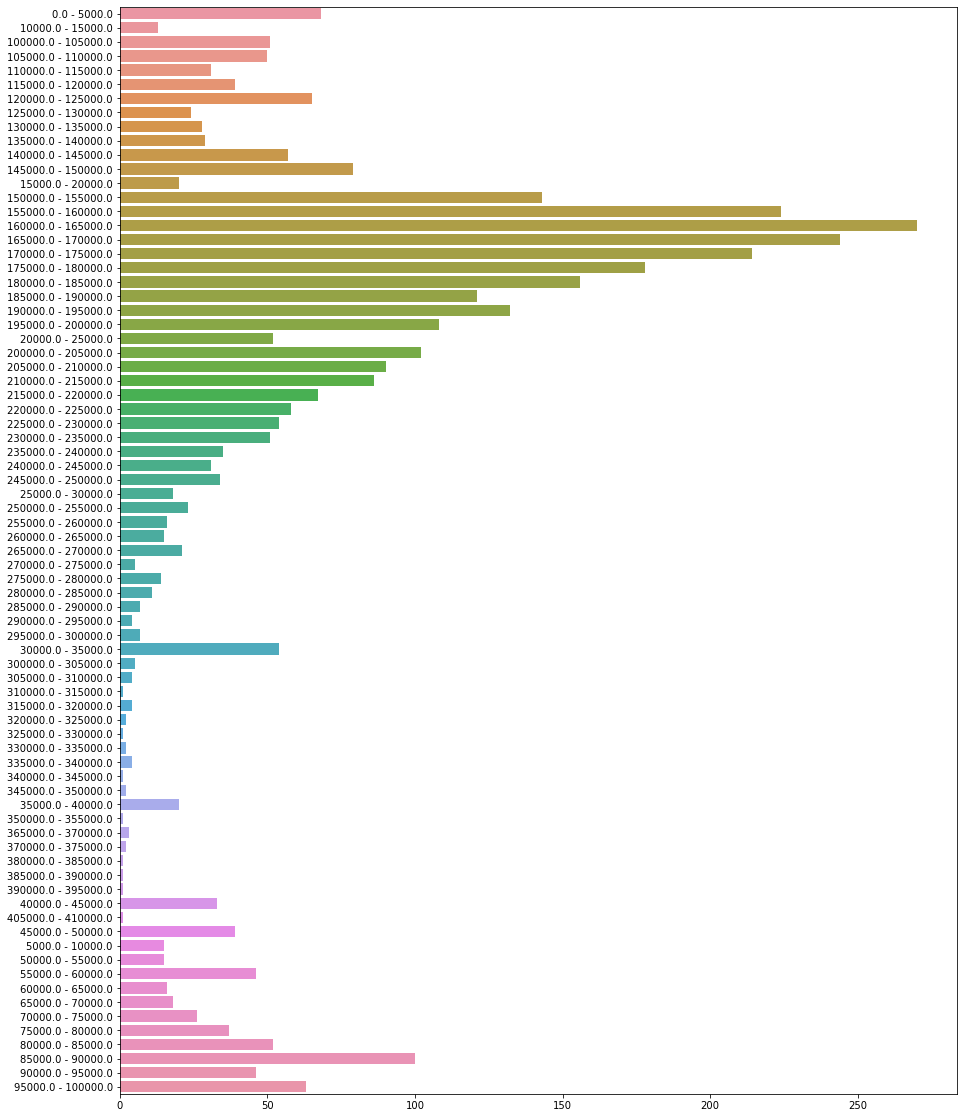

In [220]:
#Распределение зарплат по кол-ву людей за 2014 год
plt.figure(figsize=(15,20))
sns.barplot(data=a4_hist, x=a4_hist[1].tolist(), y= a4_hist['hist'].tolist())

### 6 задание: линейная регрессия. Прогноз по тому, какие будут закупки в следующем году по каждому департаменту

In [221]:
from sklearn.model_selection import train_test_split

In [250]:
df

,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,New_JobTitle
0,GARY JIMENEZ,155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,police
1,ALBERT PARDINI,212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,police
2,PATRICK GARDNER,134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,fire
3,ALSON LEE,92492.01,89062.9,134426.14,0,315981.05,315981.05,2011,fire
4,MICHAEL MORRIS,176932.64,86362.68,40132.23,0,303427.55,303427.55,2011,fire
...,...,...,...,...,...,...,...,...,...
15762,Dennis V Cravalho,0.00,0.00,242.66,0.00,242.66,242.66,2014,police
15763,Elizabeth A Maron,0.00,0.00,212.39,0.00,212.39,212.39,2014,police
15764,Patricia O Williams,0.00,0.00,134.78,0.00,134.78,134.78,2014,police
15765,Lawrence F Gatt,73.33,0.00,0.00,0.73,73.33,74.06,2014,fire


In [251]:
# прогноз на 2015 по департаменту = полиция
df_p=df[(df.New_JobTitle=='police')]
df_p

,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,New_JobTitle
0,GARY JIMENEZ,155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,police
1,ALBERT PARDINI,212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,police
7,PATRICIA JACKSON,99722.0,87082.62,110804.3,0,297608.92,297608.92,2011,police
9,RICHARD CORRIEA,198778.01,73478.2,13957.65,0,286213.86,286213.86,2011,police
18,GREGORY SUHR,256470.41,0.0,11522.18,0,267992.59,267992.59,2011,police
...,...,...,...,...,...,...,...,...,...
15761,Jerome J Alamil,309.90,0.00,0.00,64.52,309.90,374.42,2014,police
15762,Dennis V Cravalho,0.00,0.00,242.66,0.00,242.66,242.66,2014,police
15763,Elizabeth A Maron,0.00,0.00,212.39,0.00,212.39,212.39,2014,police
15764,Patricia O Williams,0.00,0.00,134.78,0.00,134.78,134.78,2014,police


In [287]:
df_p_regr=df_p.copy()
df_p_regr.drop(columns=['New_JobTitle', 'EmployeeName', 'TotalPay'], axis=1, inplace=True)
df_p_regr=df_p_regr.groupby(['Year']).sum().reset_index()
df_p_regr

,Year,TotalPayBenefits
0,2011,3.192681e+08
1,2012,2.805306e+08
2,2013,2.887283e+08
3,2014,2.820115e+08


In [291]:
X_train, X_test, y_train, y_test=train_test_split(df_p_regr.drop('TotalPayBenefits', axis=1), df_p_regr['TotalPayBenefits'], 
                                                   test_size=0.2, random_state=1107)

In [292]:
X_train.shape

(3, 1)

In [293]:
X_test.shape

(1, 1)

In [294]:
from sklearn.linear_model import LinearRegression

In [313]:
df_reg_p_regr=LinearRegression()

In [314]:
df_reg_p_regr.fit(X_train, y_train)

LinearRegression()

In [315]:
pred= df_reg_p_regr.predict(X_test)
pred

array([2.6563584e+08])

In [327]:
y_test

3    2.820115e+08
Name: TotalPayBenefits, dtype: float64

In [343]:
# прогноз на 2015 по департаменту = полиция
df_reg_p_regr.predict([['2015']])

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



array([2.50365928e+08])

In [344]:
#from sklearn.metrics import mean_squared_error

In [345]:
('Ошибка MSE=',np.sqrt(mean_squared_error(y_test,pred,squared=True)))

('Ошибка MSE=', 229502295.34334028)

In [329]:
# прогноз на 2015 по департаменту = медецина
df_m=df[(df.New_JobTitle=='medical')]
df_m

,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,New_JobTitle
10,SEBASTIAN WONG,140546.87,119397.26,18625.08,0,278569.21,278569.21,2011,medical
12,ELLEN MOFFATT,257510.59,880.16,16159.5,0,274550.25,274550.25,2011,medical
13,VENUS AZAR,257510.48,0.0,16679.79,0,274190.27,274190.27,2011,medical
14,JUDY MELINEK,257510.44,377.21,15883.56,0,273771.21,273771.21,2011,medical
26,SUSAN CURRIN,245124.44,0.0,12000.0,0,257124.44,257124.44,2011,medical
...,...,...,...,...,...,...,...,...,...
15746,Joeddie R Dela Torre,0.00,0.00,3442.70,0.00,3442.70,3442.70,2014,medical
15747,Winita S Ruggs,1777.50,0.00,0.00,956.27,1777.50,2733.77,2014,medical
15750,Lilyn Ta,2243.23,0.00,0.00,22.43,2243.23,2265.66,2014,medical
15753,Poonam S Lal,1349.26,0.00,0.00,13.49,1349.26,1362.75,2014,medical


In [330]:
df_m_regr=df_m.copy()
df_m_regr.drop(columns=['New_JobTitle', 'EmployeeName', 'TotalPay'], axis=1, inplace=True)
df_m_regr=df_m_regr.groupby(['Year']).sum().reset_index()
df_m_regr

,Year,TotalPayBenefits
0,2011,26921486.59
1,2012,31832682.18
2,2013,33782026.90
3,2014,36133544.35


In [331]:
X_train, X_test, y_train, y_test=train_test_split(df_m_regr.drop('TotalPayBenefits', axis=1), df_m_regr['TotalPayBenefits'], 
                                                   test_size=0.2, random_state=1107)

In [333]:
X_train.shape

(3, 1)

In [334]:
X_test.shape

(1, 1)

In [335]:
df_reg_m_regr=LinearRegression()

In [336]:
df_reg_m_regr.fit(X_train, y_train)

LinearRegression()

In [337]:
pred2= df_reg_m_regr.predict(X_test)
pred2

array([37705938.86666679])

In [338]:
y_test

3    36133544.35
Name: TotalPayBenefits, dtype: float64

In [339]:
# прогноз на 2015 по департаменту = медецина
df_reg_m_regr.predict([['2015']])

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



array([41136209.02166653])

In [342]:
('Ошибка MSE=',np.sqrt(mean_squared_error(y_test,pred2,squared=True)))

('Ошибка MSE=', 1572394.51666677)

In [346]:
# прогноз на 2015 по департаменту = пожарники
df_f=df[(df.New_JobTitle=='fire')]
df_f

,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,New_JobTitle
2,PATRICK GARDNER,134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,fire
3,ALSON LEE,92492.01,89062.9,134426.14,0,315981.05,315981.05,2011,fire
4,MICHAEL MORRIS,176932.64,86362.68,40132.23,0,303427.55,303427.55,2011,fire
5,JOANNE HAYES-WHITE,285262.0,0.0,17115.73,0,302377.73,302377.73,2011,fire
6,ARTHUR KENNEY,194999.39,71344.88,33149.9,0,299494.17,299494.17,2011,fire
...,...,...,...,...,...,...,...,...,...
15740,Kenneth C Farris,0.00,0.00,0.00,4645.56,0.00,4645.56,2014,fire
15752,Edward A Dunn,1063.24,0.00,132.90,385.66,1196.14,1581.80,2014,fire
15756,Kari A Johnson,688.71,0.00,0.00,143.39,688.71,832.10,2014,fire
15759,Sheryl K Lee,459.14,0.00,0.00,95.59,459.14,554.73,2014,fire


In [348]:
df_f_regr=df_f.copy()
df_f_regr.drop(columns=['New_JobTitle', 'EmployeeName', 'TotalPay'], axis=1, inplace=True)
df_f_regr=df_f_regr.groupby(['Year']).sum().reset_index()
df_f_regr

,Year,TotalPayBenefits
0,2011,2.115633e+08
1,2012,2.738104e+08
2,2013,2.910384e+08
3,2014,2.855368e+08


In [349]:
X_train, X_test, y_train, y_test=train_test_split(df_f_regr.drop('TotalPayBenefits', axis=1), df_f_regr['TotalPayBenefits'], 
                                                   test_size=0.2, random_state=1107)

In [350]:
df_reg_f_regr=LinearRegression()

In [351]:
df_reg_f_regr.fit(X_train, y_train)

LinearRegression()

In [352]:
pred3= df_reg_f_regr.predict(X_test)
pred3

array([3.38279098e+08])

In [353]:
y_test

3    2.855368e+08
Name: TotalPayBenefits, dtype: float64

In [354]:
# прогноз на 2015 по департаменту = пожарники
df_reg_f_regr.predict([['2015']])

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



array([3.78016647e+08])

In [355]:
('Ошибка MSE=',np.sqrt(mean_squared_error(y_test,pred3,squared=True)))

('Ошибка MSE=', 52742280.48333728)